In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Weighted avg

Per ogni emozione evidenzio quale feature ha avuto il punteggio massimo in un determinato modello di ML

In [2]:
print('Logistic regression')
logistic_df = pd.read_csv('logistic_regression/f1_score.csv', header=[0,1], index_col=[0,1])
logistic_df = logistic_df.drop(columns=['tilted','frontal'], level=1)
logistic_df = logistic_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
display(logistic_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

Logistic regression


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.57,0.57,0.63,0.60
disgust,0.53,0.63,0.62,0.61
fear,0.74,0.63,0.62,0.67
happiness,0.59,0.65,0.68,0.65
sadness,0.55,0.56,0.62,0.57
surprise,0.57,0.60,0.58,0.62
valence,0.52,0.64,0.61,0.63


In [3]:
print('Linear SVM')
linear_df = pd.read_csv('linear_SVM/f1_score.csv', header=[0,1], index_col=[0,1])
linear_df = linear_df.drop(columns=['tilted','frontal'], level=1)
linear_df = linear_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
linear_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

Linear SVM


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.58,0.63,0.63,0.65
disgust,0.55,0.69,0.57,0.65
fear,0.71,0.66,0.63,0.62
happiness,0.61,0.66,0.66,0.65
sadness,0.59,0.62,0.61,0.64
surprise,0.57,0.58,0.56,0.61
valence,0.54,0.62,0.61,0.60


In [4]:
print('Kernel SVM')
kernel_df = pd.read_csv('kernel_SVM/f1_score.csv', header=[0,1], index_col=[0,1])
kernel_df = kernel_df.drop(columns=['tilted','frontal'], level=1)
kernel_df = kernel_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
kernel_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

Kernel SVM


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.55,0.61,0.59,0.52
disgust,0.67,0.63,0.58,0.55
fear,0.59,0.64,0.66,0.57
happiness,0.52,0.55,0.66,0.65
sadness,0.55,0.58,0.56,0.51
surprise,0.50,0.55,0.55,0.56
valence,0.48,0.52,0.63,0.51


In [5]:
print('LSTM')
lstm_df = pd.read_csv('LSTM/f1_score.csv', header=0, index_col=[0,1], names=['delaunay', 'au_intensities', 'au_activations', 'au_intensities_activations'], skiprows=[0])
lstm_df = lstm_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
lstm_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

LSTM


,delaunay,au_intensities,au_activations,au_intensities_activations
anger,0.26,0.47,0.63,0.57
disgust,0.61,0.49,0.42,0.57
fear,0.45,0.79,0.68,0.70
happiness,0.51,0.60,0.64,0.64
sadness,0.08,0.49,0.66,0.49
surprise,0.55,0.58,0.55,0.59
valence,0.55,0.52,0.58,0.60


## Confronto con dummy classifier

Concateno la media pesata dell'f1_score di ogni modello rispetto ad ogni emozione

In [6]:
csv_list = ['logistic_regression/f1_score.csv','linear_SVM/f1_score.csv','kernel_SVM/f1_score.csv']
df_list = []

for csv in csv_list:
    df = pd.read_csv(csv, header=[0,1], index_col=[0,1])
    df_list.append(df)
    
for i, df in enumerate(df_list):
    df = df.drop(columns=['tilted','frontal'], level=1)
    df = df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
    df_list[i] = df

df = pd.read_csv('LSTM/f1_score.csv', index_col=[0,1], skiprows=[1])
df = df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
df_list.append(df)

df = pd.read_csv('dummy_classifier/f1_score.csv', header=[0,1], index_col=[0,1])
df = df.drop(columns=['tilted','frontal'], level=1)
df = df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
df_list.append(df)

df = pd.concat(df_list, axis=1, sort=False)

columns_arrays = [
    ['Logistic regression','Logistic regression','Logistic regression','Logistic regression','Linear SVM','Linear SVM','Linear SVM','Linear SVM','Kernel SVM','Kernel SVM','Kernel SVM','Kernel SVM','LSTM','LSTM','LSTM','LSTM','Dummy classifier','Dummy classifier','Dummy classifier','Dummy classifier'],
    ['delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations'],
]

columns_index = pd.MultiIndex.from_arrays(columns_arrays, names=['Modelli', 'Features'])
index = ['anger','disgust','fear','happiness','sadness','surprise','valence']

weighted_avg_df = pd.DataFrame(data=df.values, index=index, columns=columns_index)
weighted_avg_df

Modelli   Logistic regression                                \
Features             delaunay au_intensities au_activations   
anger                    0.57           0.57           0.63   
disgust                  0.53           0.63           0.62   
fear                     0.74           0.63           0.62   
happiness                0.59           0.65           0.68   
sadness                  0.55           0.56           0.62   
surprise                 0.57           0.60           0.58   
valence                  0.52           0.64           0.61   

Modelli                              Linear SVM                                \
Features  au_intensities_activations   delaunay au_intensities au_activations   
anger                           0.60       0.58           0.63           0.63   
disgust                         0.61       0.55           0.69           0.57   
fear                            0.67       0.71           0.66           0.63   
happiness                       0.65       0.61           0.66           0.66   
sadness                         0.57       0.59           0.62           0.61   
surprise                        0.62       0.57           0.58           0.56   
valence                         0.63       0.54           0.62           0.61   

Modelli                              Kernel SVM                                \
Features  au_intensities_activations   delaunay au_intensities au_activations   
anger                           0.65       0.55           0.61           0.59   
disgust                         0.65       0.67           0.63           0.58   
fear                            0.62       0.59           0.64           0.66   
happiness                       0.65       0.52           0.55           0.66   
sadness                         0.64       0.55           0.58           0.56   
surprise                        0.61       0.50           0.55           0.55   
valence                         0.60       0.48           0.52           0.63   

Modelli                                  LSTM                                \
Features  au_intensities_activations delaunay au_intensities au_activations   
anger                           0.52     0.26           0.47           0.63   
disgust                         0.55     0.61           0.49           0.42   
fear                            0.57     0.45           0.79           0.68   
happiness                       0.65     0.51           0.60           0.64   
sadness                         0.51     0.08           0.49           0.66   
surprise                        0.56     0.55           0.58           0.55   
valence                         0.51     0.55           0.52           0.58   

Modelli                              Dummy classifier                 \
Features  au_intensities_activations         delaunay au_intensities   
anger                           0.57             0.60           0.60   
disgust                         0.57             0.60           0.55   
fear                            0.70             0.62           0.66   
happiness                       0.64             0.53           0.50   
sadness                         0.49             0.53           0.56   
surprise                        0.59             0.53           0.53   
valence                         0.60             0.53           0.45   

Modelli                                              
Features  au_activations au_intensities_activations  
anger               0.56                       0.56  
disgust             0.61                       0.55  
fear                0.63                       0.60  
happiness           0.51                       0.48  
sadness             0.58                       0.56  
surprise            0.52                       0.53  
valence             0.45                       0.50

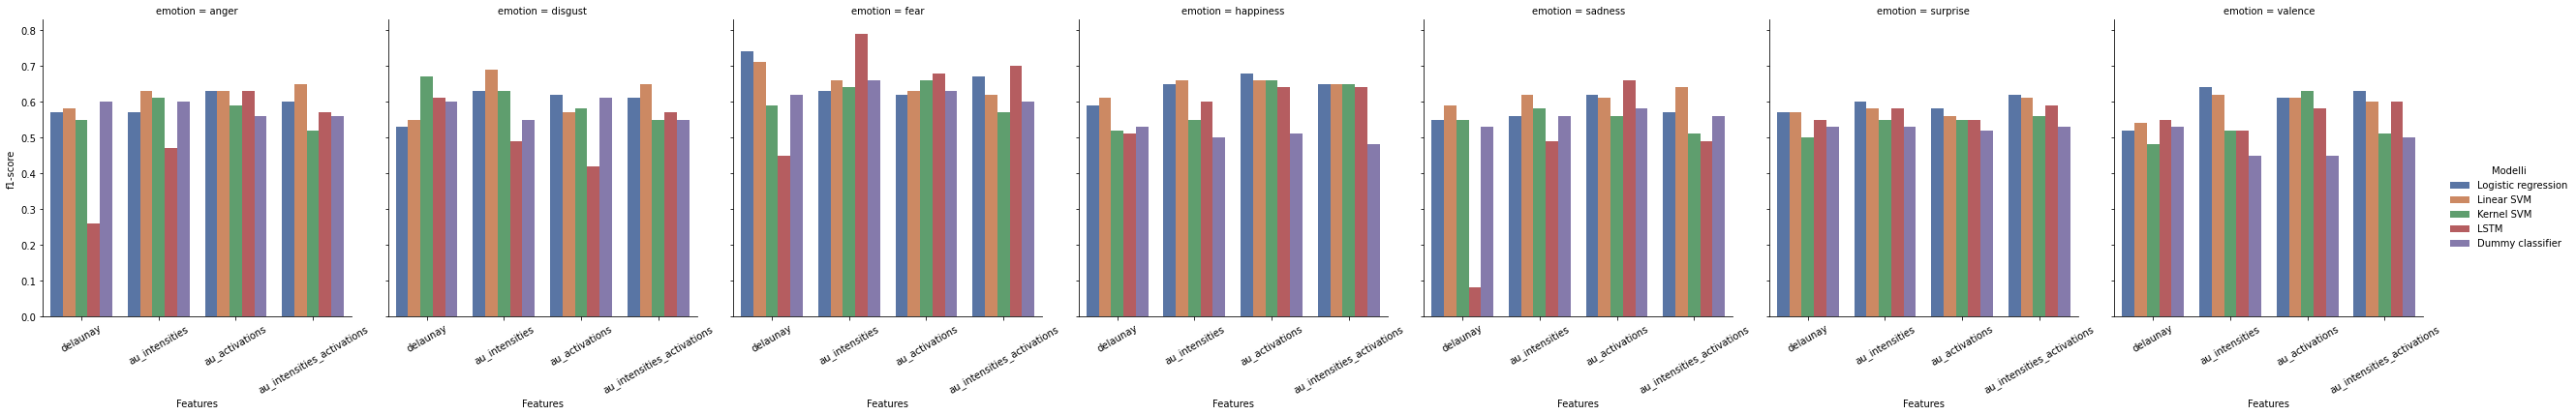

In [7]:
df = weighted_avg_df.reset_index().rename(columns={'index':'emotion'})
df = df.melt(id_vars=['emotion'], value_name='f1-score')
fg = sns.catplot(x='Features', y='f1-score', hue='Modelli', col='emotion', kind='bar', palette='deep', data=df)
fg.set_xticklabels(rotation=30)
plt.show()

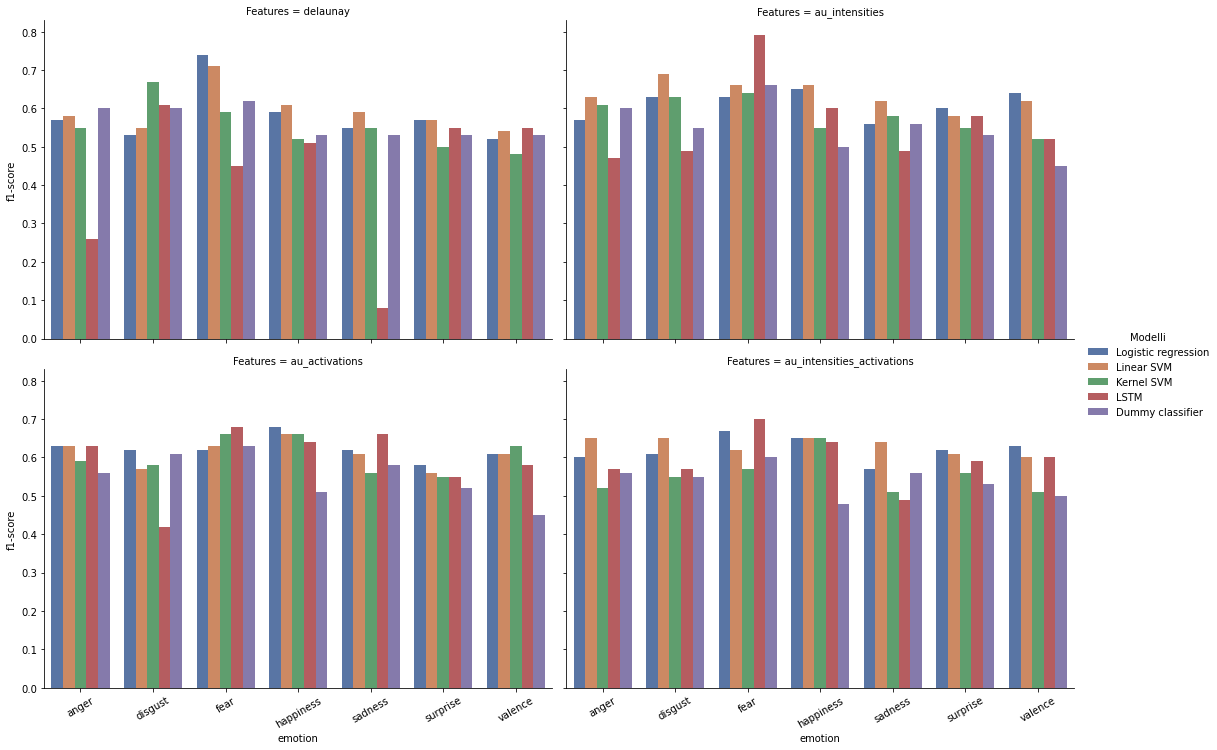

In [8]:
fg = sns.catplot(x='emotion', y='f1-score', hue='Modelli', col='Features', kind='bar', palette='deep', col_wrap=2, data=df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()

## Confronto con il paper

### Weighted avg

In [9]:
columns = ['anger','disgust','fear','happiness','sadness','surprise','valence']
data = np.array([[0.60, 0.60, 0.71, 0.69, 0.54, 0.57, 0.62]])
paper_df = pd.DataFrame(data=data, columns=columns, index=['ElderReact'])
paper_df

,anger,disgust,fear,happiness,sadness,surprise,valence
ElderReact,0.6,0.6,0.71,0.69,0.54,0.57,0.62


,Logistic regression,Linear SVM,Kernel SVM,LSTM,ElderReact
anger,0.63,0.63,0.59,0.57,0.60
disgust,0.62,0.69,0.58,0.57,0.60
fear,0.62,0.66,0.66,0.70,0.71
happiness,0.68,0.66,0.66,0.64,0.69
sadness,0.62,0.62,0.56,0.49,0.54
surprise,0.58,0.58,0.55,0.59,0.57
valence,0.61,0.62,0.63,0.60,0.62


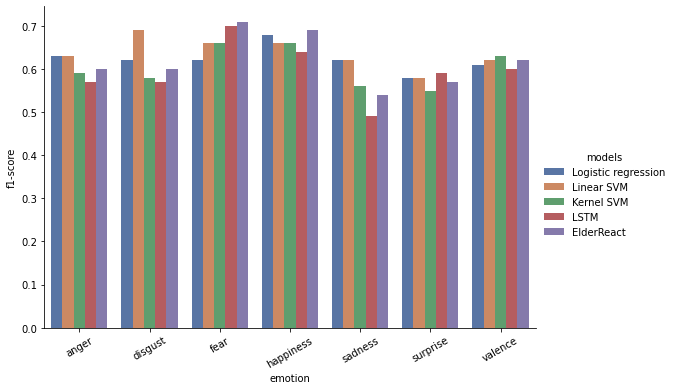

In [10]:
best_features_df = weighted_avg_df.loc[:,[('Logistic regression','au_activations'),('Linear SVM', 'au_intensities'),('Kernel SVM','au_activations'),('LSTM','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1).iloc[:,:4], paper_df.T], axis=1)
display(all_models_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

melted_df = all_models_df.reset_index().rename(columns={'index':'emotion'}).melt(id_vars='emotion', var_name='models', value_name='f1-score')
fg = sns.catplot(x='emotion', y='f1-score', hue='models', kind='bar', palette='deep', data=melted_df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()

# Medioni

## Confronto con dummy classifier

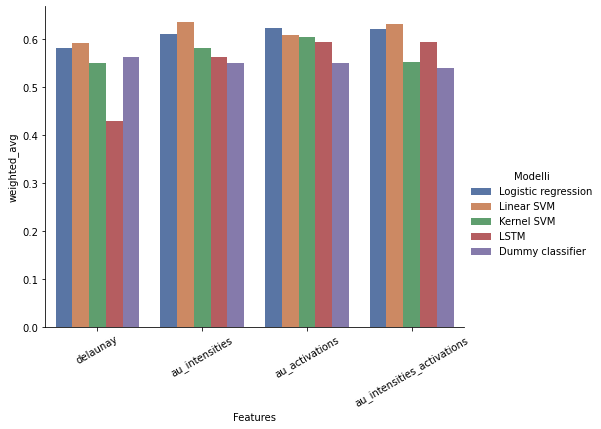

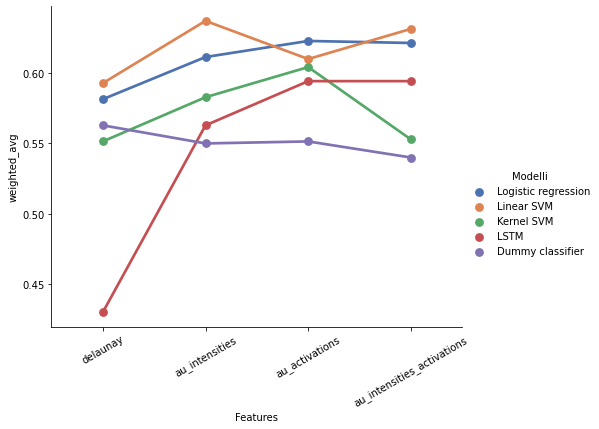

In [11]:
df = weighted_avg_df.mean(axis=0).reset_index().rename(columns={0:'weighted_avg'})

fg = sns.catplot(x='Features', y='weighted_avg', hue='Modelli', kind='bar', palette='deep', data=df, aspect=1.3)
fg.set_xticklabels(rotation=30)
plt.show()

fg = sns.catplot(x='Features', y='weighted_avg', hue='Modelli', kind='point', palette='deep', data=df, aspect=1.3)
fg.set_xticklabels(rotation=30)
plt.show()

### Meglio

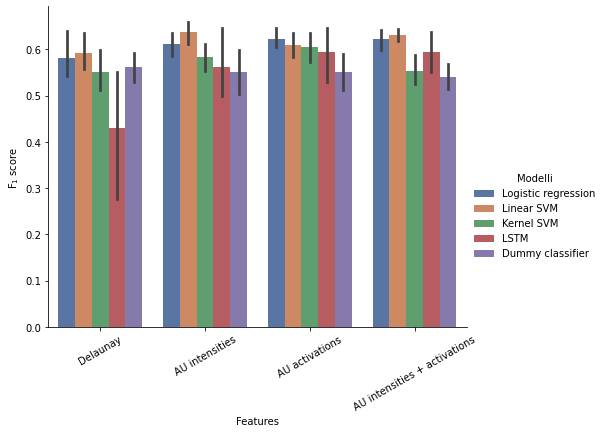

In [12]:
df = weighted_avg_df.reset_index().rename(columns={'index':'emotions'})
df = df.melt(id_vars='emotions').rename(columns={'value':'Score'})
fg = sns.catplot(x='Features', y='Score', hue='Modelli', kind='bar', palette='deep', data=df, aspect=1.3)
fg.set_xticklabels(labels= ['Delaunay', 'AU intensities', 'AU activations', 'AU intensities + activations'],rotation=30)
fg.set_ylabels(label=r'F$_1$ score')
fg.savefig('/home/filippo/Downloads/general_scores.png', dpi=600)
plt.show()

#fg = sns.catplot(x='features', y='weighted_avg', hue='models', kind='point', palette='deep', data=df, aspect=1.3)
#fg.set_xticklabels(rotation=30)
#plt.show()

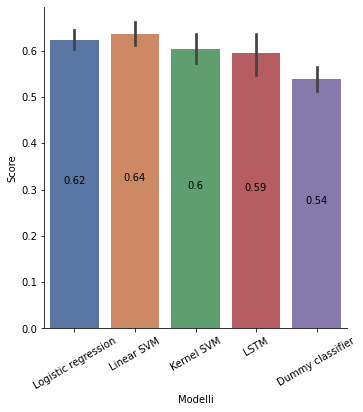

In [13]:
best_features_df = weighted_avg_df.loc[:,[('Logistic regression','au_activations'),('Linear SVM', 'au_intensities'),('Kernel SVM','au_activations'),('LSTM','au_intensities_activations'),('Dummy classifier','au_intensities_activations')]]
melted_df = best_features_df.droplevel(level=1, axis=1).melt(var_name='Modelli', value_name='Score')
fg = sns.catplot(x='Modelli', y='Score', kind='bar', palette='deep', data=melted_df)
fg.set_xticklabels(rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(best_features_df.mean(), 2)[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)

fg.savefig('/home/filippo/Downloads/dummy_score.png', dpi=600)    
plt.show()

## Confronto con il paper

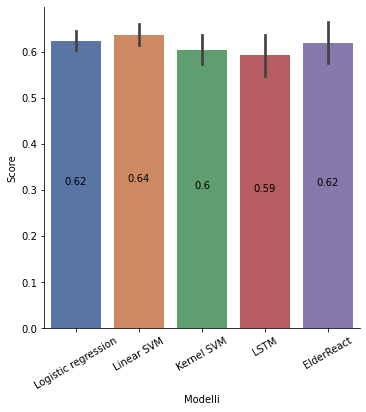

In [14]:
best_features_df = weighted_avg_df.loc[:,[('Logistic regression','au_activations'),('Linear SVM', 'au_intensities'),('Kernel SVM','au_activations'),('LSTM','au_intensities_activations'),('Dummy classifier','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1).iloc[:,:4], paper_df.T], axis=1)
melted_df = all_models_df.melt(var_name='Modelli', value_name='Score')
fg = sns.catplot(x='Modelli', y='Score', kind='bar', palette='deep', data=melted_df)
fg.set_xticklabels(rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(all_models_df.mean(), 2)[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
    
fg.savefig('/home/filippo/Downloads/paper_score.png', dpi=600)
plt.show()

## In generale

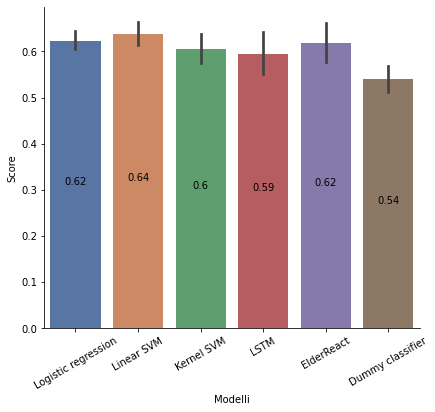

In [15]:
best_features_df = weighted_avg_df.loc[:,[('Logistic regression','au_activations'),('Linear SVM', 'au_intensities'),('Kernel SVM','au_activations'),('LSTM','au_intensities_activations'),('Dummy classifier','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1).iloc[:,:4], paper_df.T, best_features_df.droplevel(1, axis=1).iloc[:,4]], axis=1)
melted_df = all_models_df.melt(var_name='Modelli', value_name='Score')
fg = sns.catplot(x='Modelli', y='Score', kind='bar', palette='deep', data=melted_df, aspect=1.2)
fg.set_xticklabels(rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(all_models_df.mean(), 2)[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
    
plt.show()

# LSTM

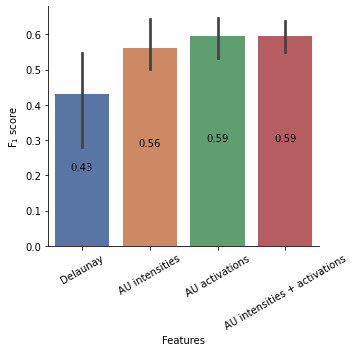

In [26]:
df = lstm_df.melt(var_name='Features', value_name='Score')
fg = sns.catplot(data=df, x='Features',y='Score', kind='bar',palette='deep')
fg.set_xticklabels(labels= ['Delaunay', 'AU intensities', 'AU activations', 'AU intensities + activations'],rotation=30)
fg.set_ylabels(label=r'F$_1$ score')

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(lstm_df.mean(), 2).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
plt.tight_layout()
plt.savefig('/home/filippo/Downloads/lstm_score.png', dpi=600)
plt.show()

# Logistic regression

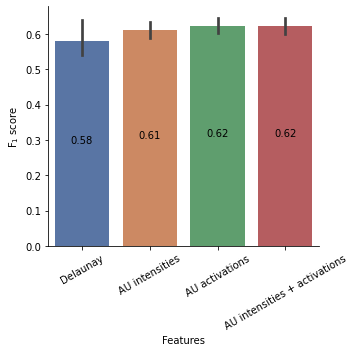

In [28]:
df = logistic_df.droplevel(level=1,axis=1).melt(var_name='Features', value_name='Score')
fg = sns.catplot(data=df, x='Features',y='Score', kind='bar',palette='deep')
fg.set_xticklabels(labels= ['Delaunay','AU intensities','AU activations','AU intensities + activations'], rotation=30)
fg.set_ylabels(label=r'F$_1$ score')

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(logistic_df.droplevel(level=1,axis=1).mean(), 2).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
plt.tight_layout()
plt.savefig('/home/filippo/Downloads/logistic_regression_score.png', dpi=600)
plt.show()

# Linear SVM

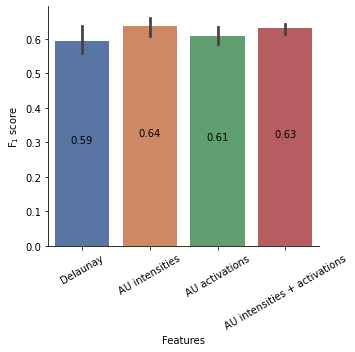

In [29]:
df = linear_df.droplevel(level=1,axis=1).melt(var_name='Features', value_name='Score')
fg = sns.catplot(data=df, x='Features',y='Score', kind='bar',palette='deep')
fg.set_xticklabels(rotation=30)
fg.set_xticklabels(labels= ['Delaunay','AU intensities','AU activations','AU intensities + activations'], rotation=30)
fg.set_ylabels(label=r'F$_1$ score')


# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(linear_df.droplevel(level=1,axis=1).mean(), 2).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
plt.tight_layout()
plt.savefig('/home/filippo/Downloads/linear_svm_score.png', dpi=600)
plt.show()

# Kernel SVM

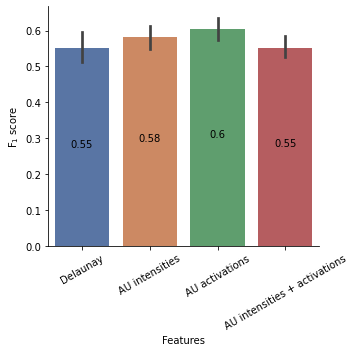

In [30]:
df = kernel_df.droplevel(level=1,axis=1).melt(var_name='Features', value_name='Score')
fg = sns.catplot(data=df, x='Features',y='Score', kind='bar',palette='deep')
fg.set_xticklabels(labels= ['Delaunay','AU intensities','AU activations','AU intensities + activations'], rotation=30)
fg.set_ylabels(label=r'F$_1$ score')


# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(kernel_df.droplevel(level=1,axis=1).mean(), 2).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
plt.tight_layout()
plt.savefig('/home/filippo/Downloads/kernel_svm_score.png', dpi=600)
plt.show()

# Prova

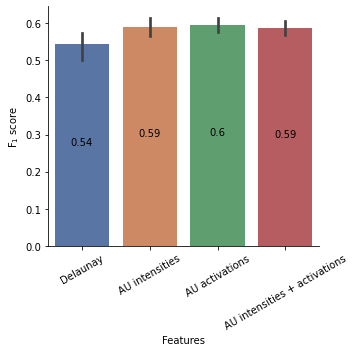

In [50]:
df = weighted_avg_df.reset_index().rename(columns={'index':'Emotions'}).melt(id_vars='Emotions', value_name=r'F$_1$ score')
fg = sns.catplot(x='Features', y=r'F$_1$ score', kind='bar', palette='deep', data=df, aspect=1)
fg.set_xticklabels(labels= ['Delaunay','AU intensities','AU activations','AU intensities + activations'], rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(df.groupby('Features', sort=False).mean(), 2).values[i][0] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
plt.tight_layout()
plt.savefig('/home/filippo/Downloads/features_score.png', dpi=600)
plt.show()